In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

In [2]:
%cd /Users/ilyarudyak/Dropbox/courses/2018/cs230-deep-learning/cs230_coursera
%pwd
%load_ext autoreload
%autoreload 1
%aimport course1_nn_dl.week3_shallow_nn.planar_classifier
from course1_nn_dl.week3_shallow_nn.planar_classifier import *

/Users/ilyarudyak/Dropbox/courses/2018/cs230-deep-learning/cs230_coursera


## getting data and plotting

In [3]:
np.random.seed(1)
X, Y = load_planar_dataset()

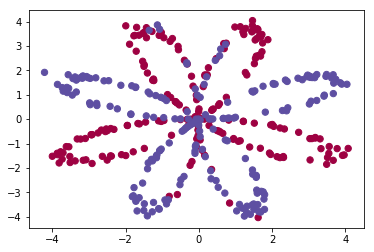

In [4]:
plot_planar(X, Y)

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


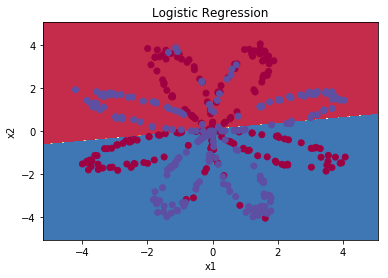

In [5]:
fit_logistic_regression(X, Y)

## NN implementation

### 1 - NN structure and parameters

In [6]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [7]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[ 0.]]


### 2 - forward propagation and costs

In [8]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.000499755777742 -0.000496963353232 0.000438187450959 0.500109546852


In [9]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.692919893776


### 3 - backward propagation

In [10]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[ 0.06589489]]


In [11]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[ 0.00010457]]


### 4 - model

In [12]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

iteration:0 cost:0.69
iteration:1000 cost:-inf
iteration:2000 cost:-inf

/Users/ilyarudyak/Dropbox/courses/2018/cs230-deep-learning/cs230_coursera/course1_nn_dl/week3_shallow_nn/planar_classifier.py:96: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
/Users/ilyarudyak/Dropbox/courses/2018/cs230-deep-learning/cs230_coursera/course1_nn_dl/week3_shallow_nn/planar_utils.py:34: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))



iteration:3000 cost:-inf
iteration:4000 cost:-inf
iteration:5000 cost:-inf
iteration:6000 cost:-inf
iteration:7000 cost:-inf
iteration:8000 cost:-inf
iteration:9000 cost:-inf
W1 = [[-4.1849704   5.33206786]
 [-7.53803944  1.20755728]
 [-4.19298927  5.32617186]
 [ 7.53798187 -1.20759023]]
b1 = [[ 2.329328  ]
 [ 3.81001635]
 [ 2.33008707]
 [-3.81011669]]
W2 = [[-6033.82356997 -6008.14296163 -6033.08780193  6008.07953954]]
b2 = [[-52.67922931]]


In [13]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.666666666667


iteration:0 cost:0.69
iteration:1000 cost:0.29
iteration:2000 cost:0.25
iteration:3000 cost:0.23
iteration:4000 cost:0.23
iteration:5000 cost:0.22
iteration:6000 cost:0.22
iteration:7000 cost:0.22
iteration:8000 cost:0.22
iteration:9000 cost:0.22


Text(0.5,1,'Decision Boundary for hidden layer size 4')

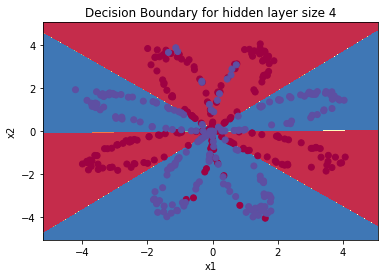

In [14]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

## other datasets

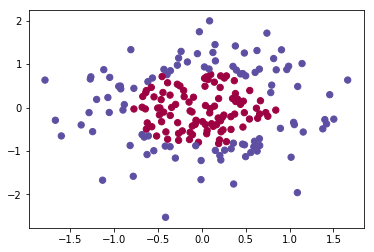

In [19]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "gaussian_quantiles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "noisy_moons":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);